In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture-vegetables-fruits-time-series-prices/kalimati_tarkari_dataset.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/agriculture-vegetables-fruits-time-series-prices/kalimati_tarkari_dataset.csv')
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


In [26]:
# Prophet
## Prophet can only handle one time series at a time. Filter the data for a specific commodity

In [28]:
selected_commodity = "Cabbage(Local)"
filtered_df = df[df["Commodity"] == selected_commodity]

In [35]:
filtered_df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
6,6,Cabbage(Local),2013-06-16,Kg,6.0,10.0,8.0
80,80,Cabbage(Local),2013-06-17,Kg,6.0,10.0,8.0
153,153,Cabbage(Local),2013-06-18,Kg,8.0,10.0,9.0
226,226,Cabbage(Local),2013-06-19,Kg,10.0,15.0,12.5
299,299,Cabbage(Local),2013-06-20,Kg,10.0,15.0,12.5
...,...,...,...,...,...,...,...
196716,196716,Cabbage(Local),2021-05-09,Kg,20.0,30.0,25.0
196807,196807,Cabbage(Local),2021-05-10,Kg,20.0,30.0,25.0
196898,196898,Cabbage(Local),2021-05-11,Kg,20.0,25.0,22.5
196989,196989,Cabbage(Local),2021-05-12,Kg,20.0,25.0,22.5


In [30]:
prophet_df = filtered_df[["Date", "Average"]].rename(columns={"Date": "ds", "Average": "y"})

In [31]:
from prophet import Prophet

# Initialize the model
model = Prophet()

# Fit the model
model.fit(prophet_df)

16:56:45 - cmdstanpy - INFO - Chain [1] start processing
16:56:46 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = model.make_future_dataframe(periods=12, freq='M')  # Predict the next 12 months

In [33]:
# make prediction
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


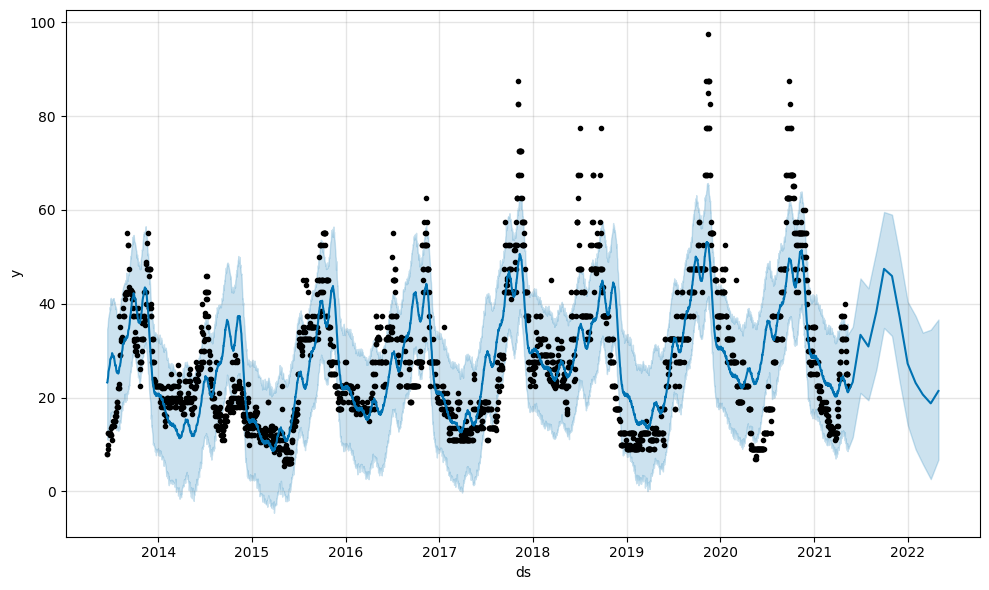

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

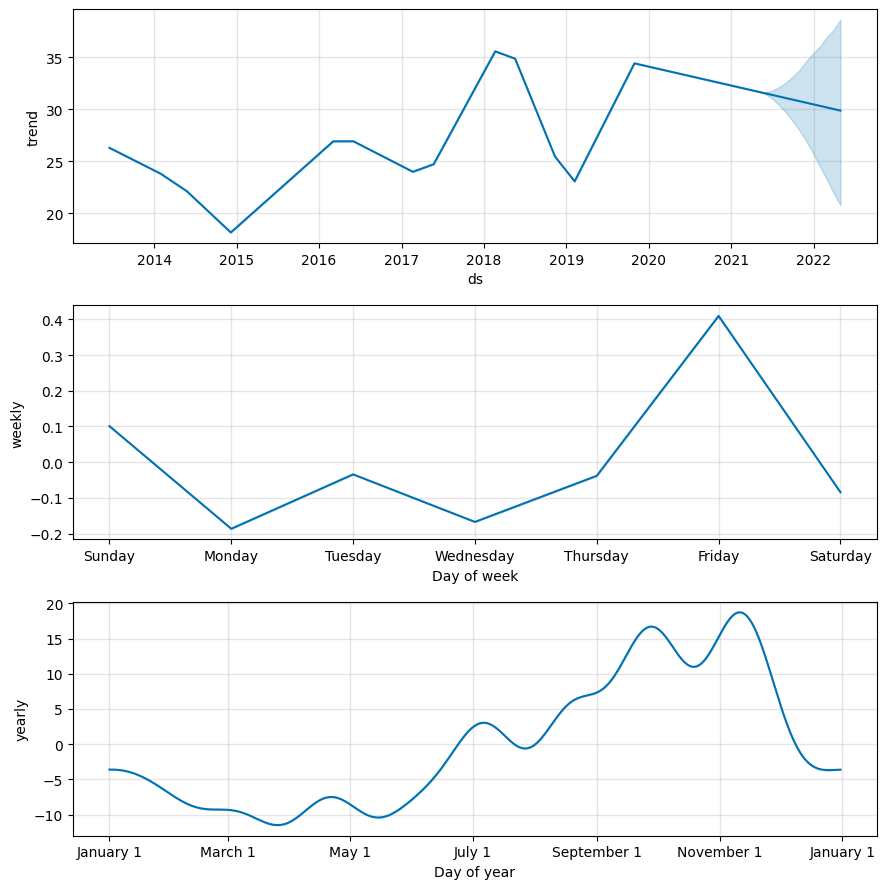

In [34]:
import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast)
plt.show()

# Optional: Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()